In [219]:
# # case 1: single moving chair, small FoV
# case_id = 1
# idx = 1346
# traj_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_1/cotracker_dense_8/trajectory_{:06d}.npy".format(idx)
# selected_seg_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_1/deva_ram_gdino_selected_segment_id.json"
# frame_info_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_1/deva_ram_gdino_foreground_info_frame.json"
# annotation_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_1/deva_ram_gdino/Annotations/{:06d}.png".format(idx)

# # case 2: ipad and hands, medium FoV
# case_id = 2
# idx = 260
# traj_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_3/cotracker_dense_8/trajectory_{:06d}.npy".format(idx)
# selected_seg_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_3/deva_ram_gdino_selected_segment_id.json"
# frame_info_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_3/deva_ram_gdino_foreground_info_frame.json"
# annotation_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_3/deva_ram_gdino/Annotations/{:06d}.png".format(idx)


# # case 3: no moving things, large FoV
# case_id = 3
# idx = 778
# traj_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/cotracker_dense_8/trajectory_{:06d}.npy".format(idx)
# selected_seg_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/deva_ram_gdino_selected_segment_id.json"
# frame_info_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/deva_ram_gdino_foreground_info_frame.json"
# annotation_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/deva_ram_gdino/Annotations/{:06d}.png".format(idx)

# # case 4: two hands and openning of rice-cooker
# # this case the rice-cooker is not recognized as moving...
# case_id = 4
# idx = 360
# traj_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/cotracker_dense_8/trajectory_{:06d}.npy".format(idx)
# selected_seg_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/deva_ram_gdino_selected_segment_id.json"
# frame_info_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/deva_ram_gdino_foreground_info_frame.json"
# annotation_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/deva_ram_gdino/Annotations/{:06d}.png".format(idx)

# # case 5: two pans
# case_id = 5
# idx = 2220
# traj_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/cotracker_dense_8/trajectory_{:06d}.npy".format(idx)
# selected_seg_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/deva_ram_gdino_selected_segment_id.json"
# frame_info_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/deva_ram_gdino_foreground_info_frame.json"
# annotation_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_2/deva_ram_gdino/Annotations/{:06d}.png".format(idx)

# # case 6: openning of iPad
# case_id = 6
# idx = 386
# traj_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_3/cotracker_dense_8/trajectory_{:06d}.npy".format(idx)
# selected_seg_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_3/deva_ram_gdino_selected_segment_id.json"
# frame_info_json_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_3/deva_ram_gdino_foreground_info_frame.json"
# annotation_path = "/scratch/quanta/Experiments/Thesis/exps/prob_video_3/deva_ram_gdino/Annotations/{:06d}.png".format(idx)

In [220]:
import json

import numpy as np
from PIL import Image

annotation_img = np.array(Image.open(annotation_path))

with open(str(selected_seg_json_path)) as f:
    segment_ids = np.array(json.load(f))


with open(str(frame_info_json_path)) as f:
    frame_segment_info = json.load(f)

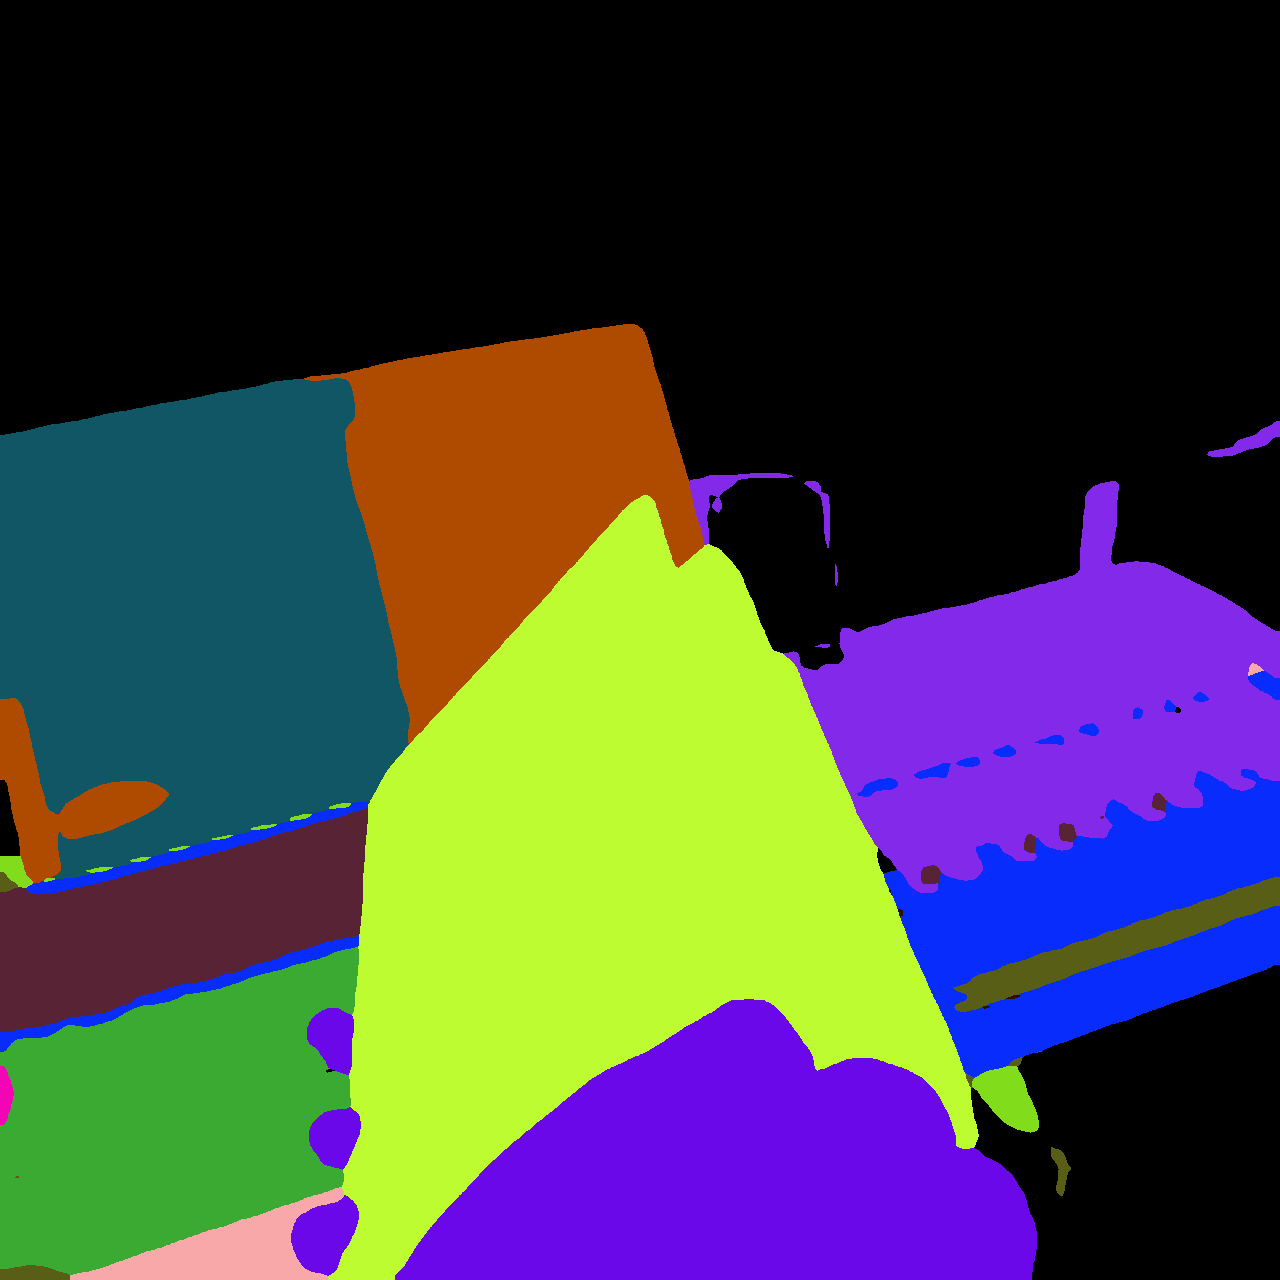

In [221]:
display(Image.fromarray(annotation_img))

In [222]:
annotation_img = annotation_img.astype(int)
id_img = annotation_img[:, :, 0] + annotation_img[:, :, 1] * 256 + annotation_img[:, :, 2] * 256 * 256

In [223]:
filtered_img = np.zeros(annotation_img.shape[:2], dtype=bool)

for i in frame_segment_info[idx].keys():
    if int(i) in segment_ids:
        filtered_img[id_img == int(i)] = True

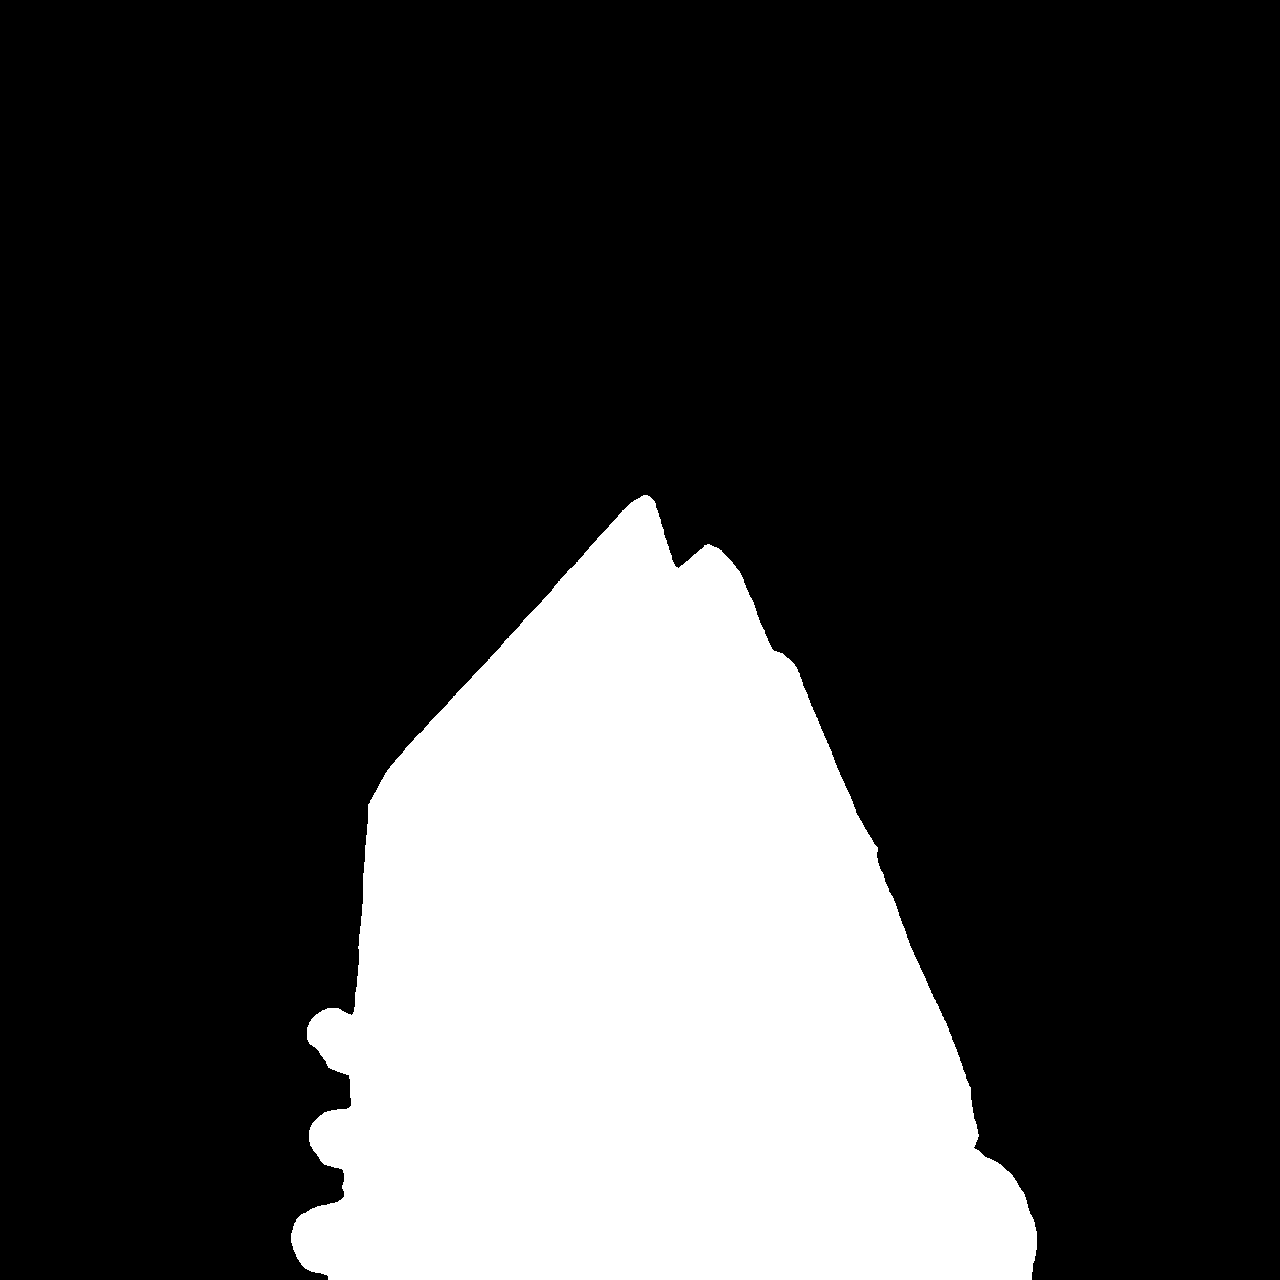

In [224]:
display(Image.fromarray(filtered_img.astype(np.uint8)*255))

In [225]:
filtered_img.mean()

0.2292999267578125

In [226]:
np.save("foreground_mask_{:02d}.npy".format(case_id), filtered_img)